# Pràctica 3 - Regressions 

## Introducció

### Regressió o classificació?

Donats els següents escenaris, com tractaries cadascun dels casos: com a problemes de regressió o de classificació?

#### Escenari 1:
Suposeu que estem treballant en la predicció del temps, i volem predir si demà plourà o no a les 5 de la tarda.

---

...

---

#### Escenari 2:
Suposeu que estem treballant en la predicció del mercat de valors i voleu predir el preu que tindrà una acció concreta demà (en dòlars).

---

...

---

#### Escenari 3:
Suposeu que treballem a la indústria de la música, i que volem desenvolupar un servei que rebi enregistraments breus de música que els usuaris han gravat amb els seus telèfons mòbils, i que respongui a cada usuari amb el títol de la cançó.

---

...

---

#### Escenari 4:
Suposeu que treballem a una empresa que vol entendre quin és l'impacte dels seus canals de màrqueting (xarxes socials, campanyes de correu electrònic) en les vendes.

---

...

---

## 3.1 - Regressió lineal

### Exemple senzill de regressió lineal

Considereu el següent conjunt de dades de 𝑚=4 exemples d'entrenament:

| x   |  y  |
|:---:|:---:|
|  1  | 1.0 | 
|  2  | 1.5 | 
|  4  | 2.5 | 
|  0  | 0.5 |

Considereu el model de regressió lineal $h_w(x) = w_0+w_1x$.

<font color=blue>**Pregunta 1:** Podria un model de regressió lineal adaptar-se perfectament a aquestes dades?</font>

---

...

---


<font color=blue>**Pregunta 2:** Quins serien els valors de $w_0$ i $w_1$ del model?</font>

---

...

---

### Hores d’estudi i notes d’examen

In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [15]:
points = pd.read_csv('data.csv', delimiter=',', names = ["hours", "mark"])

points

,hours,mark
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


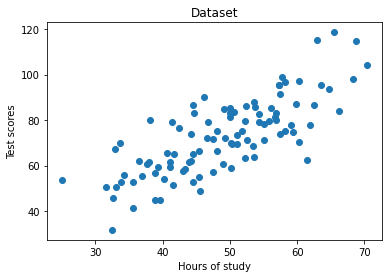

In [28]:
x = np.array(points.values[:,0])
y = np.array(points.values[:,1])


plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

<font color=blue>**Pregunta 1:** Hi ha una relació entre les hores d'estudi i la nota? Penseu que podríem utilitzar un model lineal amb aquestes dades?</font>

---

...

---

In [21]:
model = LinearRegression()

In [41]:
print(f"Shape of x:{x.shape}, shape of y: {y.shape}")

Shape of x:(100, 1), shape of y: (100,)


> *Nota: La funció <b>fit</b> espera una matriu a les dades d'entrada. Espera que la nostre x sigui una matriu.*

In [42]:
x = x.reshape(-1,1)
print("Shape of x:", x.shape)

model.fit(x,y)

model.__dict__

Shape of x: (100, 1)


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([1.32243102]),
 '_residues': 11025.73834662132,
 'rank_': 1,
 'singular_': array([96.97524963]),
 'intercept_': 7.991020982270399}

In [38]:
print(f"w_o = {model.intercept_}, w_1 = {model.coef_[0]}")

w_o = 7.991020982270399, w_1 = 1.3224310227553597


<font color=blue>**Pregunta 2:** Utilitzant els valors de w_0 i w_1, i considerant que el model de regressió lineal és $h_w(x) = w_0+w_1x$, podrieu dibuixar la recta que passa per aquests punts?</font>

> *Nota: Utilitzeu la formula $h_w(x) = w_0+w_1x$ per obtenir els punts de la recta*

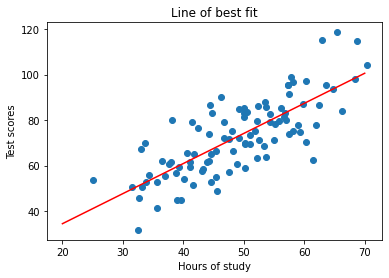

<font color=blue>**Pregunta 3:** Utilitzant la funció <i>predict</i> del model de scikit-learn podrieu dibuixar la recta que passa per aquests punts?</font>

> *Nota: Utilitzeu la funció <i>predict</i> per obtenir els punts de la recta. Recordeu que aquesta funció <u>espera una matriu</u> com a dades d'entrada*

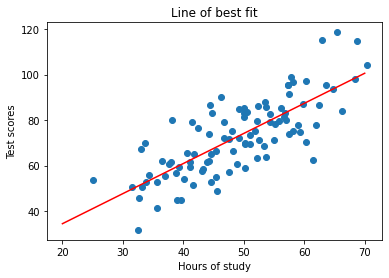

### Preus de cotxes

In [98]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

df = pd.read_csv(path)

df.shape

(201, 29)

In [60]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Com volem utilitzar aquestes dades per a entrenar un model de regressió lineal, ens quedem únicament amb les dades numèriques de la base de dades.

In [76]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


A continuació mirem si a les dades hi ha valors no definits.

In [77]:
df_numeric.isna().any().any()

True

Eliminarem els registres de la base de dades que en continguin.

In [78]:
print(df_numeric.shape)

df_numeric = df_numeric.dropna()

print(df_numeric.shape)

(201, 19)
(197, 19)


Definim x, y.

In [89]:
X = df_numeric.drop(columns=['price'])
y = df_numeric['price']

X.shape, y.shape

((197, 18), (197,))

In [82]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [83]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

<font color=blue>**Exercici 1:** Dividiu les dades en dos subconjunts: el conjunt de dades d'entrenament i el conjunt de proves.</font>

> *Nota: Utilitzeu la funció de scikit-learn <i>train_test_split</i> per obtenir aquests conjunts.*

((147, 18), (50, 18), (147,), (50,))

<font color=blue>**Exercici 2:** Definiu un model de regressió lineal i entreneu-lo amb les dades del conjunt d'entrenament.</font>

<font color=blue>**Exercici 3:** Utilitzeu el model resultant amb el conjunt de dades de proves.</font>

(50,)

Com de bé ho ha fet el model? Per a tenir una visió del rendiment del sistema, podeu graficar l'error d'entrenament i de prova.

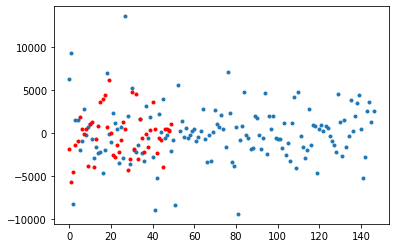

In [126]:
train_predict = model.predict(X_train)

train_error = (y_train-train_predict).values
test_error = (y_test-predict).values

plt.plot(train_error, '.')
plt.plot(test_error, '.r');

A aquesta gràfica, podeu afegir-hi informació de la mitjana i la desviació estàndard del error.

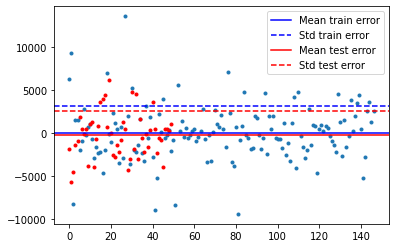

In [123]:
plt.plot(train_error, '.')
plt.plot(test_error, '.r')

plt.axhline(y=np.mean(train_error), color='b', linestyle='-', label='Mean train error')
plt.axhline(y=np.std(train_error), color='b', linestyle='--', label='Std train error')

plt.axhline(y=np.mean(test_error), color='r', linestyle='-', label='Mean test error')
plt.axhline(y=np.std(test_error), color='r', linestyle='--', label='Std test error')


plt.legend();

També podeu fer els histogrames dels errors

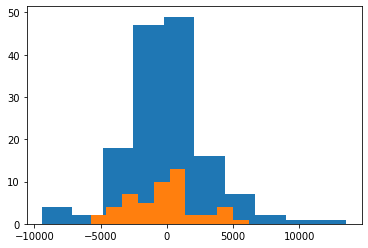

In [118]:
plt.hist(train_error)
plt.hist(test_error);

Visualitzar l'histograma com a una funció de densitat i fer-los transparents és bo per veure la superposició dels dos.

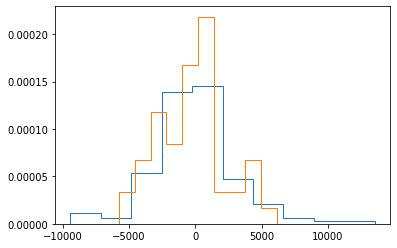

In [120]:
plt.hist(train_error, density = True, histtype = 'step');
plt.hist(test_error,density = True, histtype = 'step');

Per avaluar el rendiment del model númericament, tenim una mètrica anomenada Mean Square Error (MSE). Aquesta mètrica mesura la diferència quadrada mitjana entre els valors estimats i reals dins d'un conjunt de dades.

In [128]:
mse = mean_squared_error(y_test,predict)

mse

6768910.459537515

L'error real és:

In [129]:
np.sqrt(mse)

2601.712985618805

Quina importància té cada característica sobre el resultat del model?

In [130]:
columns = X_train.columns
columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [131]:
coef = model.coef_
coef

array([ 4.46962914e+02, -2.70651970e+00,  1.68597824e+02, -1.33339083e+04,
        2.77665143e+04,  2.34023904e+02,  5.58200781e-01,  1.13540770e+02,
       -1.65047562e+02, -2.91828452e+03, -2.29013316e+02,  3.61007782e+01,
        1.81450360e+00, -1.76940938e+02,  3.10320233e+02,  6.79170342e+02,
        3.51862978e+03, -3.51862978e+03])

Ordenarem aquestes característiques segons els valors dels seus coeficients de més gran a més petit.

In [133]:
coef = np.abs(coef)
coef

array([4.46962914e+02, 2.70651970e+00, 1.68597824e+02, 1.33339083e+04,
       2.77665143e+04, 2.34023904e+02, 5.58200781e-01, 1.13540770e+02,
       1.65047562e+02, 2.91828452e+03, 2.29013316e+02, 3.61007782e+01,
       1.81450360e+00, 1.76940938e+02, 3.10320233e+02, 6.79170342e+02,
       3.51862978e+03, 3.51862978e+03])

In [134]:
coef_columns = list(zip(coef, columns))
coef_columns

[(446.9629139452784, 'symboling'),
 (2.706519699482655, 'normalized-losses'),
 (168.59782380886418, 'wheel-base'),
 (13333.908287341652, 'length'),
 (27766.51432458056, 'width'),
 (234.0239042679181, 'height'),
 (0.5582007806630107, 'curb-weight'),
 (113.54076955494706, 'engine-size'),
 (165.04756193775145, 'bore'),
 (2918.2845173940154, 'stroke'),
 (229.01331630824507, 'compression-ratio'),
 (36.100778203740354, 'horsepower'),
 (1.8145035952367397, 'peak-rpm'),
 (176.9409377721289, 'city-mpg'),
 (310.3202334488275, 'highway-mpg'),
 (679.1703421521765, 'city-L/100km'),
 (3518.6297823532827, 'diesel'),
 (3518.6297823532404, 'gas')]

In [135]:
coef_columns.sort(key=lambda x: x[0], reverse=True)
coef_columns

[(27766.51432458056, 'width'),
 (13333.908287341652, 'length'),
 (3518.6297823532827, 'diesel'),
 (3518.6297823532404, 'gas'),
 (2918.2845173940154, 'stroke'),
 (679.1703421521765, 'city-L/100km'),
 (446.9629139452784, 'symboling'),
 (310.3202334488275, 'highway-mpg'),
 (234.0239042679181, 'height'),
 (229.01331630824507, 'compression-ratio'),
 (176.9409377721289, 'city-mpg'),
 (168.59782380886418, 'wheel-base'),
 (165.04756193775145, 'bore'),
 (113.54076955494706, 'engine-size'),
 (36.100778203740354, 'horsepower'),
 (2.706519699482655, 'normalized-losses'),
 (1.8145035952367397, 'peak-rpm'),
 (0.5582007806630107, 'curb-weight')]

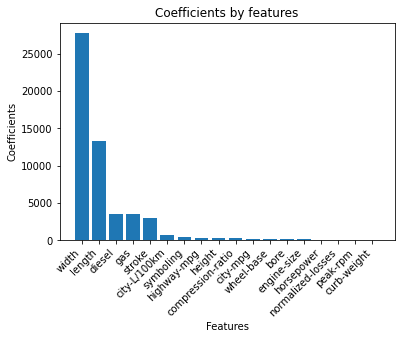

In [138]:
coef = [i[0] for i in coef_columns]
labels = [i[1] for i in coef_columns]


plt.bar(labels, coef)
plt.title('Coefficients by features')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=45, ha='right');

## 3.2 - Regressió polinòmica

### Milles per galó i el preu del cotxe

Ara entrenarem un model utilitzant una única columna de la base de dades, les milles per galó (highway-mpg)

Les milles per galó és una mesura d’eficiència de combustible que indica quantes milles pot recórrer un cotxe amb un galó de combustible. És una unitat de mesura utilitzada principalment als Estats Units per avaluar el consum de combustible dels vehicles. Per exemple, si un cotxe té una eficiència de 30 mpg, això significa que pot recórrer 30 milles amb un galó de combustible.

In [180]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [186]:
def plot_regression(X_train, y_train, x_test, y_test, title='Line of best fit'):
    plt.scatter(X_train, y_train)
    plt.plot(x_test, y_test, c='r')
    plt.xlabel('feature')
    plt.ylabel('prediction')
    plt.title(title)
    plt.show()

In [201]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

df = pd.read_csv(path)

X= df["highway-mpg"]
y = df["price"]

X.shape, y.shape

((201,), (201,))

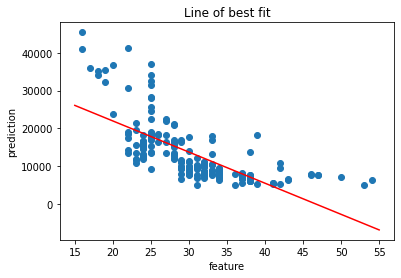

In [202]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)

X_test = np.arange(15,56)
pred = model.predict(X_test.reshape(-1,1))

plot_regression(X, y, X_test, pred);

(201, 1) (201, 3)


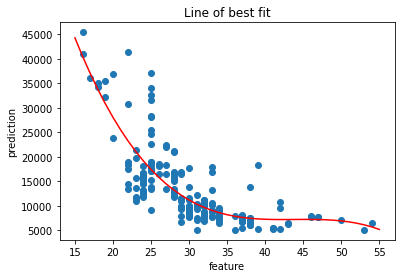

In [203]:
X_ = X.values.reshape(-1,1)
X_polynomial = np.hstack((X_,X_**2,X_**3))

print(X_.shape, X_polynomial.shape)

X_test = np.arange(15,56).reshape(-1,1)
X_polynomial_test = np.hstack((X_test,X_test**2,X_test**3))


model = LinearRegression()
model.fit(X_polynomial, y)
pred = model.predict(X_polynomial_test)

plot_regression(X, y, X_test, pred);

Fem el mateix però ara utilitzant la llibreria de scikit-learn.

(201, 1) (201, 3)


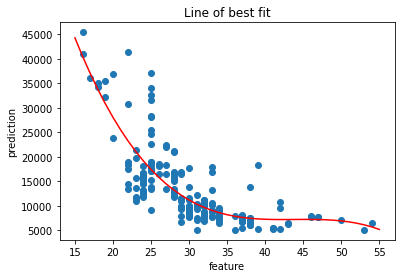

In [206]:
from sklearn.preprocessing import PolynomialFeatures

X_= df[["highway-mpg"]].values.reshape(-1,1)
#X_= df[["highway-mpg", "horsepower"]].values.reshape(-1,2)
#X_= df[["highway-mpg", "horsepower", "height"]].values.reshape(-1,3)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_polynomial = poly.fit_transform(X_)   
# equivalent to
# poly.fit(X)
# X_= poly.transform(X)

print(X_.shape, X_polynomial.shape)

X_pred = np.arange(15,56).reshape(-1,1)
X_polynomial_pred = poly.transform(X_pred)

model = LinearRegression()
model.fit(X_polynomial, y)
pred = model.predict(X_polynomial_pred)

plot_regression(X, y, X_test, pred);

In [184]:
def train_test_model(X_train, y_train, X_test, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polynomial = poly.fit_transform(X_train)
    X_test_polynomial = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_polynomial, y_train)
    pred_train = model.predict(X_train_polynomial)
    pred_test = model.predict(X_test_polynomial)
    return(pred_test, pred_train)

def test_degree(X, degree, title):
    X_train = X.values.reshape(-1,1)
    X_test = np.arange(15,56).reshape(-1,1)

    pred_test, pred_train = train_test_model(X_train, y, X_test, degree)

    plot_regression(X_train, y, X_test, pred_test, title)

<font color=blue>**Exercici 1:** Utilitzant les funcions definides, entreneu el model polinomial amb diferents graus.</font>

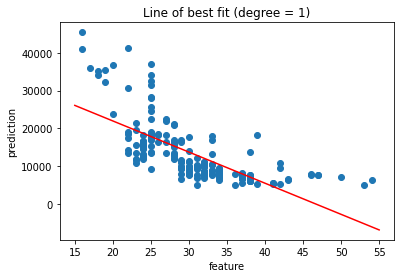

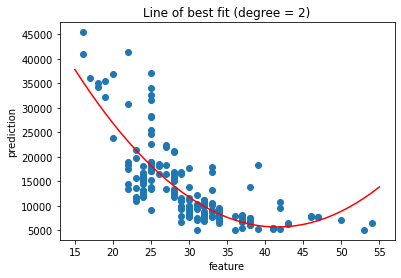

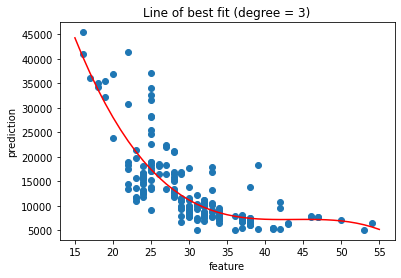

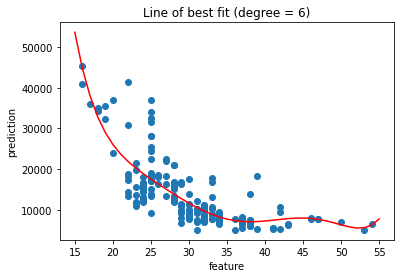

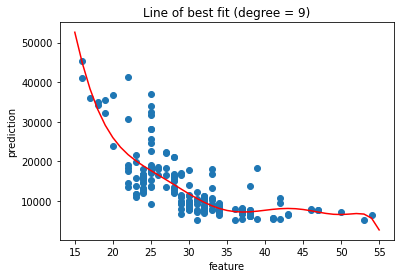

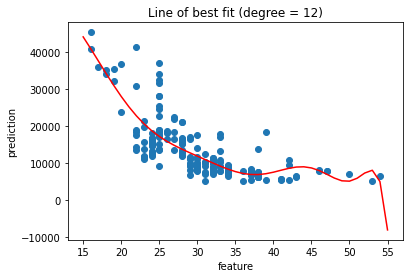

<font color=blue>**Exercici 2:** Visualitzeu com és l'error del sistema utilitzant diferents graus i utilitzant diferents mides del conjunt de proves.</font>

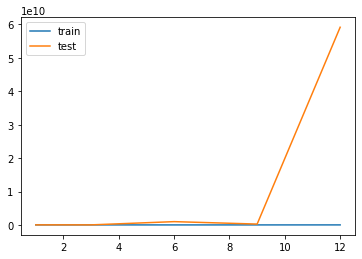

In [214]:
from sklearn.model_selection import train_test_split    
from sklearn.metrics import mean_squared_error

X = df[["highway-mpg","horsepower"]].values.reshape(-1,2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=????, random_state=12345)

error_train = []
error_test = []
degrees = ????
for d in degrees:
    pred_test, pred_train = train_test_model(X_train, y_train, X_test, d)
    error_train.append(mean_squared_error(y_train, pred_train))
    error_test.append(mean_squared_error(y_test, pred_test))    

plt.plot(degrees, error_train, label='train') 
plt.plot(degrees, error_test, label='test')
plt.legend();